# Study of the Efficacy of Different Anti-Cancer Treatments

## Data Preparation

In [9]:
# Import dependencies

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.stats as st
import numpy as np
import dataframe_image as dfi

In [3]:
# Read CSV files

mouse_raw = pd.read_csv(r'C:\Users\ericj\OneDrive\Documents\Repositories\Study_of_the_Efficacy_of_Different_Anti-Cancer_Treatments\data/Mouse_metadata.csv')
study_raw = pd.read_csv(r'C:\Users\ericj\OneDrive\Documents\Repositories\Study_of_the_Efficacy_of_Different_Anti-Cancer_Treatments\data/Study_results.csv')

In [4]:
# Merge the two data

mouse_raw
study_raw

merged_df = pd.merge(mouse_raw, study_raw, on = 'Mouse ID', how = 'left')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Total number of mice

number_of_mice = merged_df['Mouse ID'].nunique()
print(f'There are {number_of_mice} mice in the sample.')

There are 249 mice in the sample.


In [6]:
# Finding any duplicates in trials and deleting the corrresponding specimen as bad samples.

find_duplicates = merged_df[['Mouse ID', 'Timepoint']]
duplicates = find_duplicates.duplicated(keep = False)
find_duplicates.loc[duplicates, :]
merged_df[merged_df['Mouse ID'] == 'g989'].index.values
clean_df = merged_df.drop(merged_df.index[908:921], inplace = False)

new_number_of_mice = clean_df['Mouse ID'].nunique()
new_number_of_mice
print(f"After the drop of the bad specimen 'g989', there are {new_number_of_mice} mice in the sample.")

After the drop of the bad specimen 'g989', there are 248 mice in the sample.


In [7]:
# Display the clean data table

clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Export a tabular figure of the DataFrame to be used in ReadMe.md

for_export = clean_df.head(10)
dfi.export(for_export,"rawdata.png")

## Summary Statistics

In [13]:
# Creating a summary statistic of Tumor Volume (mm3)

group_regimen = clean_df.groupby('Drug Regimen')

mean_tumor_regimen = group_regimen['Tumor Volume (mm3)'].mean()
median_tumor_regimen = group_regimen['Tumor Volume (mm3)'].median()
variance_tumor_regimen = group_regimen['Tumor Volume (mm3)'].var()
stdev_tumor_regimen = group_regimen['Tumor Volume (mm3)'].std()
sem_tumor_regimen = group_regimen['Tumor Volume (mm3)'].sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume (mm3)' : mean_tumor_regimen, 
                                  'Median Tumor Volume (mm3)' : median_tumor_regimen, 
                                  'Variance Tumor Volume (mm3)' : variance_tumor_regimen, 
                                  'Standard Deviation Tumor Volume (mm3)' : stdev_tumor_regimen, 
                                  'Standard Error Tumor Volume (mm3)' : sem_tumor_regimen})

summary_statistics

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Export a tabular figure of the DataFrame to be used in ReadMe.md

dfi.export(summary_statistics, "summarystatistics.png")

## Chart Observations

<IPython.core.display.Javascript object>


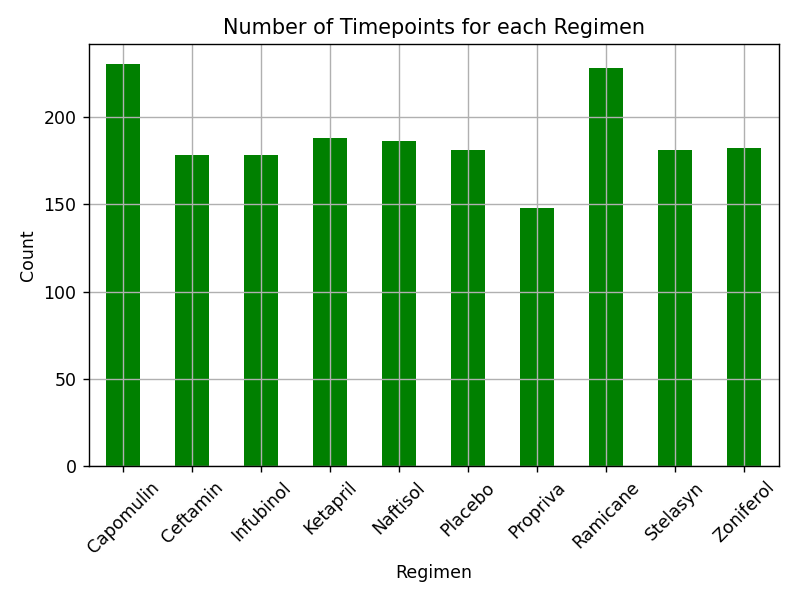

In [17]:
# A bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas

count_timepoint = group_regimen['Timepoint'].count()
count_timepoint.plot(kind = 'bar', title = 'Number of Timepoints for each Regimen', xlabel = 'Regimen', ylabel = 'Count', 
                    color = 'green', rot = 45, grid = True)
plt.tight_layout()


# # A bar plot showing the total number of timepoints for all mice tested for each drug regimen using PyPlot

# x = clean_df['Drug Regimen'].unique()
# plt.bar(x, count_timepoint, color = 'blue')
# plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')
# plt.xlabel('Regimen')
# plt.ylabel('Count')
# plt.title('Number of Timepoints for each Regimen')
# plt.grid()
# plt.tight_layout()
# plt.show()

<IPython.core.display.Javascript object>


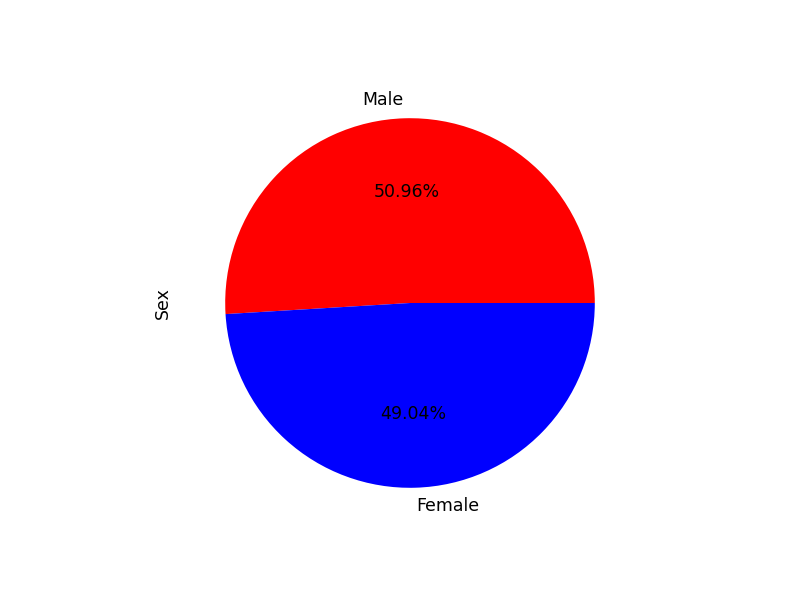

<AxesSubplot:ylabel='Sex'>

In [18]:
# A pie plot showing the distribution of sex using Pandas

group_sex = clean_df['Sex'].value_counts()
group_sex.plot(kind = 'pie', shadow = False, autopct="%1.2f%%", colors = ['red', 'blue'])


# A pie plot showing the distribution of sex using PyPlot

# male = clean_df[clean_df['Sex'] == 'Male']
# male_count = male['Sex'].count()
# female = clean_df[clean_df['Sex'] == 'Female']
# female_count = female['Sex'].count()

# sizes = [male_count, female_count]
# labels = ['Male', 'Female']
# colors = ['Red', 'Blue']
# explode = [0,0]

# plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct="%1.1f%%")

## Quartiles, Outliers, and a Box Plot

In [20]:
# Calculating the final tumor volume of each mouse across four of the most promising treatment regimens by mean volume: 
# Capomulin, Ramicane, Infubinol, and Ceftamin.
# Then calculating the quartiles and IQR, and determine if there are any potential outliers across all four regimens.

group_mouse = clean_df.groupby('Mouse ID')

last_timepoint = group_mouse['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
new_merged = pd.merge(clean_df, last_timepoint_df, on = 'Mouse ID', how = 'left')
new_merged = new_merged.rename(columns = {'Timepoint_x' : 'Timepoint', 'Timepoint_y' : 'Last Timepoint'})
new_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [22]:
# Export a tabular figure of the DataFrame to be used in ReadMe.md

dfi.export(new_merged.head(10), "newmerged.png")

In [23]:
# Locating potential outliers for each regimen

regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume = []
last_timepoint_only = new_merged[(new_merged['Timepoint']) == (new_merged['Last Timepoint'])]

for regimen in regimens:
    temporary_df = last_timepoint_only[last_timepoint_only['Drug Regimen'] == regimen]
    volume = temporary_df['Tumor Volume (mm3)']
    tumor_volume.append(volume)
    
    quartiles = volume.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = volume.loc[(volume >= upper_bound) | (volume <= lower_bound)]
    print(f"{regimen}'s potential outliers in tumor volume (mm3) data: {outliers.values}")

Capomulin's potential outliers in tumor volume (mm3) data: []
Ramicane's potential outliers in tumor volume (mm3) data: []
Infubinol's potential outliers in tumor volume (mm3) data: [36.3213458]
Ceftamin's potential outliers in tumor volume (mm3) data: []


In [24]:
# Printing the final tumor volume of every mouse under each treatment regimen

tumor_volume

[19      23.343598
 29      28.484033
 39      28.430964
 64      30.485985
 104     31.023923
 124     31.896238
 134     32.377357
 144     33.329098
 164     34.455298
 204     37.311846
 224     36.041047
 244     37.074024
 282     38.846876
 299     38.939633
 309     38.982878
 317     38.753265
 337     38.125164
 340     39.952347
 350     40.658124
 360     40.159220
 370     40.728578
 380     41.483008
 390     41.581521
 440     47.685963
 1442    46.539206
 Name: Tumor Volume (mm3), dtype: float64,
 9      22.050126
 49     29.128472
 59     30.276232
 74     30.564625
 84     30.638696
 94     31.560470
 114    31.095335
 154    33.397653
 174    32.978522
 184    33.562402
 194    36.134852
 214    38.810366
 234    37.225650
 254    36.374510
 262    36.561652
 272    37.311236
 289    38.342008
 327    38.407618
 400    40.659006
 410    40.667713
 420    45.220869
 430    43.047543
 447    43.419381
 449    43.166373
 453    44.183451
 Name: Tumor Volume (mm3), dtype

<IPython.core.display.Javascript object>


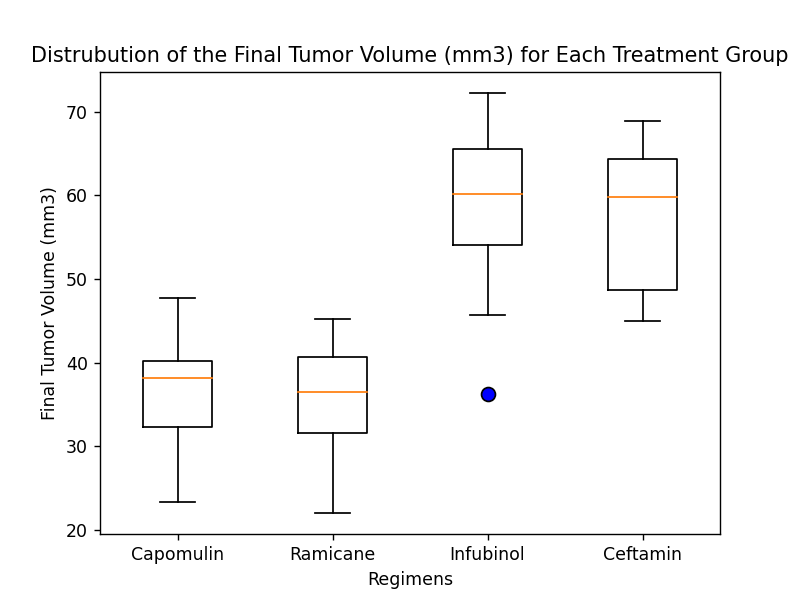

In [25]:
# Boxplot to depict the outlier

plt.boxplot(tumor_volume, flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'blue'})
x_axis = np.arange(0, len(regimens))+1
ticklocations = [value for value in x_axis]
labels = regimens
plt.xticks(ticklocations, regimens)
plt.xlabel('Regimens')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distrubution of the Final Tumor Volume (mm3) for Each Treatment Group')
plt.show()

## Line and Scatter Plot

<IPython.core.display.Javascript object>


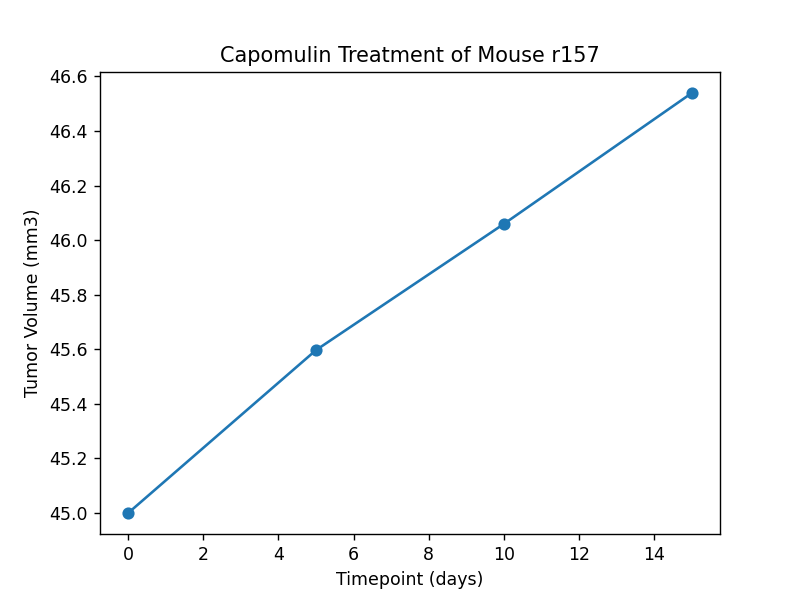

Text(0.5, 1.0, 'Capomulin Treatment of Mouse r157')

In [26]:
# Generating a line plot that shows the tumor volume vs. time point Mouse 'r157' treated with Capomulin

capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
cap_mouse_df = capomulin_df[capomulin_df['Mouse ID'] == 'r157']

t_volume = cap_mouse_df['Tumor Volume (mm3)']
t_point = cap_mouse_df['Timepoint']

plt.plot(t_point, t_volume, marker = 'o')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse r157')

<IPython.core.display.Javascript object>


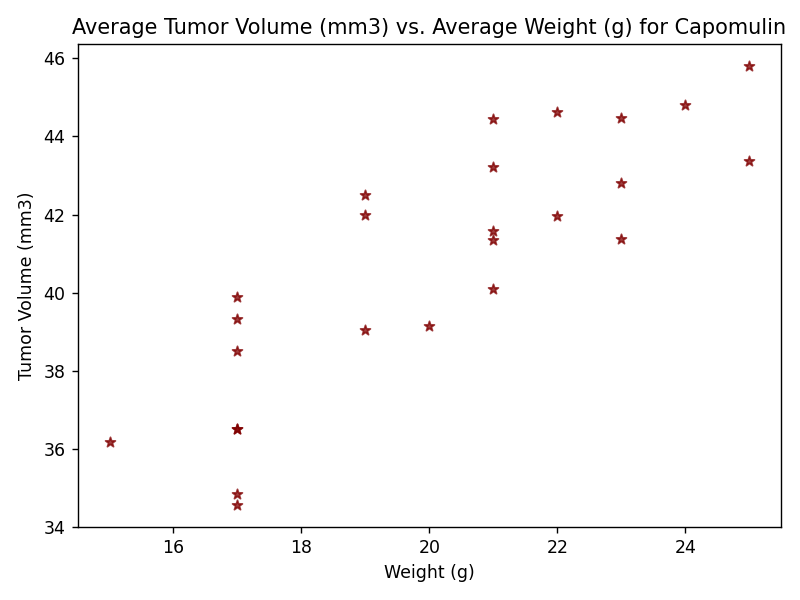

In [27]:
# Generating a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen

cap_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
cap_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

plt.scatter(cap_weight, cap_volume, marker = '*', color = 'maroon', alpha = 0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Average Weight (g) for Capomulin')
plt.tight_layout()
plt.show()

## Correlation and Regression

In [56]:
# Calculating the correlation coefficient and linear regression model
# between mouse weight and average tumor volume for mice under Capomulin treatment

corrcoeff = st.pearsonr(cap_weight, cap_volume)[0]
corrcoeff = round(corrcoeff, 2)
p_value = st.pearsonr(cap_weight, cap_volume)[1]
p_value = round(p_value, 2)
print(f'Correlation Coefficient: {corrcoeff}')
print(f'P-Value: {p_value}')
print(st.pearsonr(cap_weight, cap_volume))
print(f'The P-Value shows that the relationship is statistically significant.')

Correlation Coefficient: 0.84
P-Value: 0.0
(0.8419363424694719, 1.3225722434712586e-07)
The P-Value shows that the relationship is statistically significant.


<IPython.core.display.Javascript object>


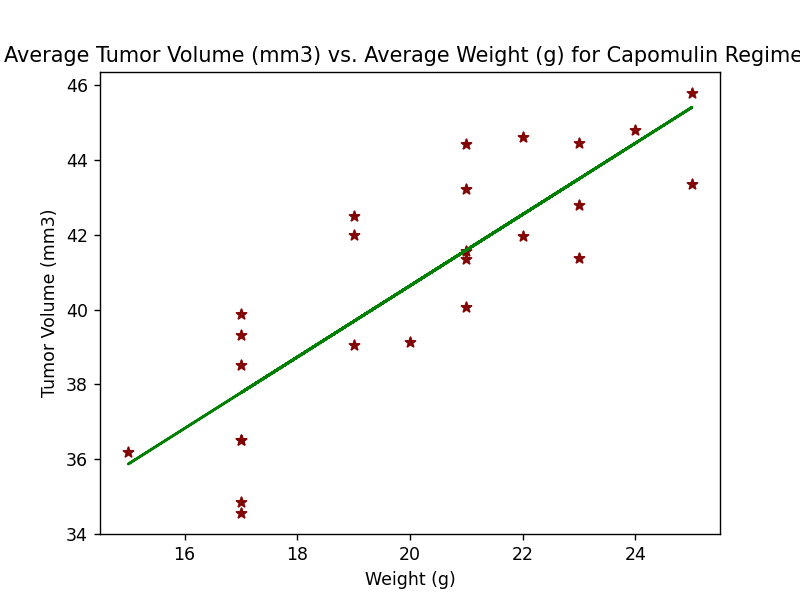

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)
The coefficient of determination, or R-Squared, is 0.7088568047708723


In [62]:
# Linear Regression:

plt.scatter(cap_weight, cap_volume, marker = '*', color = 'maroon', alpha = 0.75)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Average Tumor Volume (mm3) vs. Average Weight (g) for Capomulin Regimen')


(slope, intercept, r_val, p_val, SE) = st.linregress(cap_weight, cap_volume)
lin_regress_val = slope * cap_weight + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.scatter(cap_weight, cap_volume, marker = '*', color = 'maroon', alpha = 0.75)
plt.plot(cap_weight,lin_regress_val,"g-")

plt.show()
print(st.linregress(cap_weight, cap_volume))
print(f'The coefficient of determination, or R-Squared, is {r_val * r_val}')